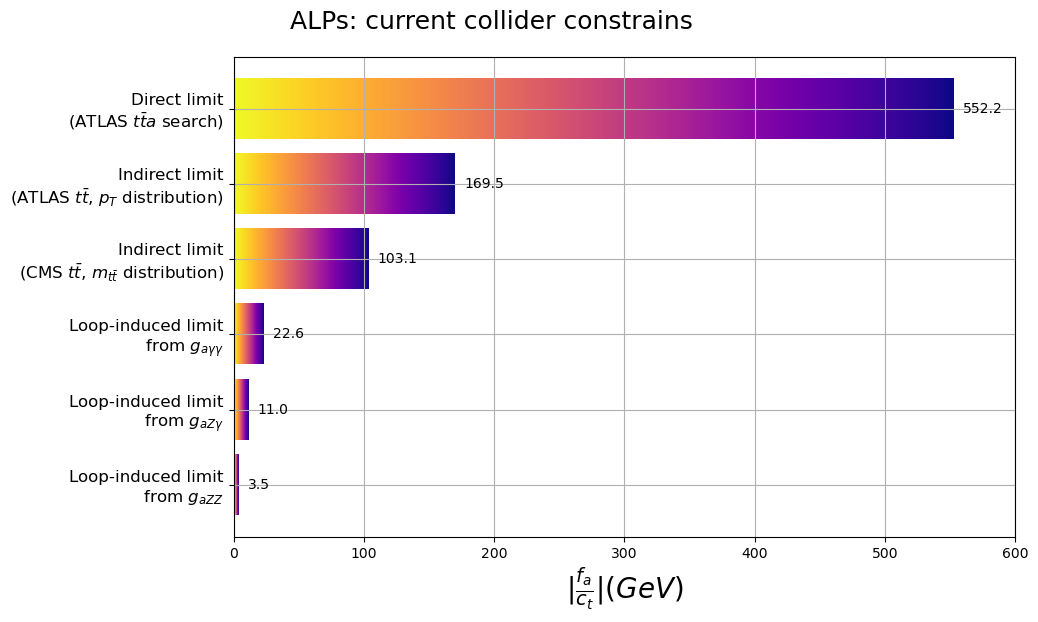

In [45]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6), facecolor=(1, 1, 1))
# can choose among viridis, plasma, inferno, magma, and cividis
mpl.pyplot.plasma()

x_axis = ['Loop-induced limit\n from $g_{aZZ}$',
          'Loop-induced limit\n from $g_{aZ\gamma}$',
          'Loop-induced limit\n from $g_{a\gamma\gamma}$',
          'Indirect limit\n'+r'(CMS $t\bar{t}$, $m_{t\bar{t}}$ distribution)',
          'Indirect limit\n'+r'(ATLAS $t\bar{t}$, $p_T$ distribution)',
          'Direct limit\n'+r'(ATLAS $t\bar{t}a$ search)']
y_axis = [3.5,11.0,22.6,1000/9.7,1000/5.9,1000/1.811]

bar = ax.barh(x_axis, y_axis)
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))


plot_title = 'ALPs: current collider constrains'
subtitle = 'Current constrains'
title_size = 18
label_size = 14
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.33, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)

      
ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

        
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = 7
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.1f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'black')            # Change label color to white
    
            
## Set subtitle
#tfrom = ax.get_xaxis_transform()
#ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

#Set x-label
ax.set_xlabel(r'$\left|\frac{f_{a}}{c_{t}}\right|(GeV)$', color='black', fontsize=20)
ax.set_xlim(0,600)    

plt.yticks(fontsize=12)            
plt.savefig('money_plot.pdf',bbox_inches="tight")
#plt.xlabel('(GeV)')
#plt.ylabel('')
#plt.show()
#plt.barh(x_axis, y_axis,color=['red', 'green','cyan'])

